In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
print("sys_font number : {}".format(len(sys_font)))
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print("nanum_font number : {}".format(len(nanum_font))) # 나눔 폰트 없음.


sys_font number : 17
['/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/Li

In [3]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 120493 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [4]:
sys_font = fm.findSystemFonts()
print("sys_font number : {}".format(len(sys_font)))

nanum_font = [f for f in sys_font if 'Nanum' in f]
print("nanum_font number : {}".format(len(nanum_font)))

sys_font number : 56
nanum_font number : 39


In [5]:
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정
mpl.rcParams['axes.unicode_minus'] = False # 그래프의 x, y축에 정상적인 - 표시 설정

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.read_csv('/content/drive/MyDrive/23-2_DSL/EDA/finaldata.csv', delimiter = ',')

In [ ]:
data.head()

,year,semester,lecture_type,prof,name,class,prob_success,prob_success_m,prob_success_um,mileage_cut,mileage_cut_m,mileage_cut_um
0,2022,1,1,김일문,수리통계학(2),None,0.889,1.000,0.724,3,1.0,3.0
1,2021,2,1,강승호,수리통계학(2),None,0.797,0.930,0.524,12,2.0,12.0
2,2021,1,0,임종호,수리통계학(2),None,0.988,1.000,0.958,1,1.0,1.0
3,2020,2,1,강승호,수리통계학(2),None,0.835,1.000,0.612,12,1.0,12.0
4,2022,2,1,김일문,수리통계학(2),None,0.586,0.909,0.160,12,2.0,12.0


In [ ]:
online = data.loc[data['lecture_type'] == 0]
on_off = data.loc[data['lecture_type'] == 1]
offline = data.loc[data['lecture_type'] == 2]

print("비대면 수업 개수 :", len(online))
print("블렌디드 수업 개수 :", len(on_off))
print("대면 수업 개수 :", len(offline))

print("원래 수업 개수 :", len(data))



비대면 수업 개수 : 270
블렌디드 수업 개수 : 141
대면 수업 개수 : 91
원래 수업 개수 : 502
[8.933, 8.532, 9.198]


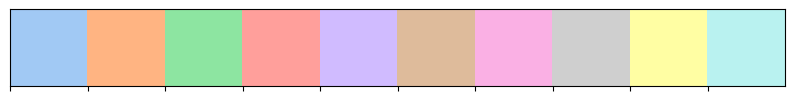

In [ ]:
palette = sns.color_palette("pastel")
sns.palplot(palette)

## 1. 마일리지 별 그래프

[8.933, 8.532, 9.198]


<ipython-input-88-42c956152721>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = data, x = 'lecture_type', y = 'mileage_cut', order = [0, 1, 2], ci=False) # order: 순서 정렬


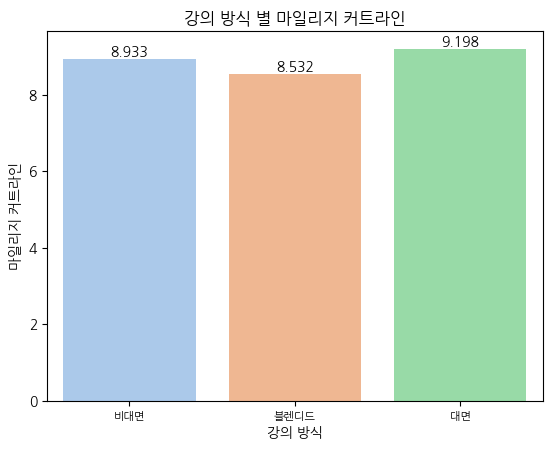

In [ ]:
mean_mileage = data.groupby('lecture_type')['mileage_cut'].mean().round(3).tolist()
print(mean_mileage)

sns.set_palette("pastel")
sns.barplot(data = data, x = 'lecture_type', y = 'mileage_cut', order = [0, 1, 2], ci=False) # order: 순서 정렬
plt.xlabel("강의 방식")
plt.ylabel("마일리지 커트라인")
plt.title("강의 방식 별 마일리지 커트라인", fontsize = 12)
plt.xticks([0, 1, 2], ['비대면', '블렌디드', '대면'], fontsize = 8) # x축 눈금 설정. 회전 시키거나 글씨 크기 조절 가능.
for i, v in enumerate(mean_mileage):
    plt.text(i, v, str(v), ha='center', va='bottom')
#plt.show()
plt.savefig('/content/drive/MyDrive/23-2_DSL/EDA/mileage_cut.png')

[6.802, 6.343, 6.045]


<ipython-input-89-b3f365742a49>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = m_data, x = 'lecture_type', y = 'mileage_cut_m', order = [0, 1, 2], ci=False) # order: 순서 정렬


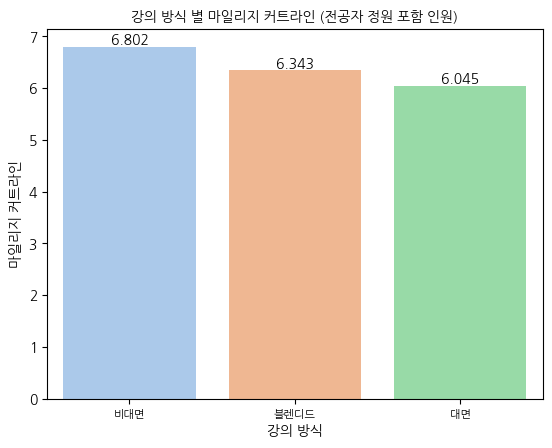

In [ ]:
m_data = data.dropna(subset =['mileage_cut_m'])
mean_m_mileage = m_data.groupby('lecture_type')['mileage_cut_m'].mean().round(3).tolist()
print(mean_m_mileage)

sns.set_palette("pastel")
sns.barplot(data = m_data, x = 'lecture_type', y = 'mileage_cut_m', order = [0, 1, 2], ci=False) # order: 순서 정렬
plt.xlabel("강의 방식")
plt.ylabel("마일리지 커트라인")
plt.title("강의 방식 별 마일리지 커트라인 (전공자 정원 포함 인원)", fontsize = 10)
plt.xticks([0, 1, 2], ['비대면', '블렌디드', '대면'], fontsize = 8) # x축 눈금 설정. 회전 시키거나 글씨 크기 조절 가능.
for i, v in enumerate(mean_m_mileage):
    plt.text(i, v, str(v), ha='center', va='bottom')
#plt.show()
plt.savefig('/content/drive/MyDrive/23-2_DSL/EDA/mileage_cut_m.png')

[9.18, 8.745, 10.0]


<ipython-input-90-fe687008c17a>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = um_data, x = 'lecture_type', y = 'mileage_cut_um', order = [0, 1, 2], ci=False) # order: 순서 정렬


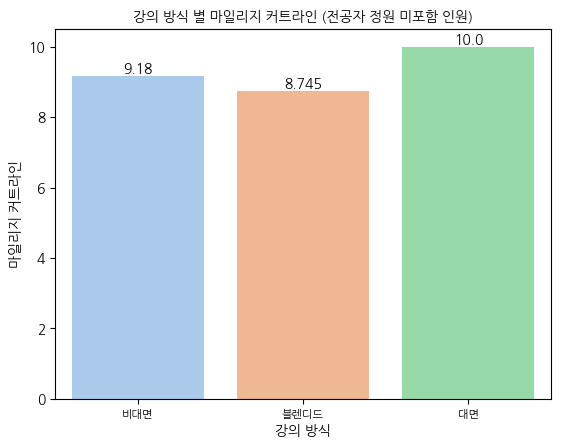

In [ ]:
um_data = data.dropna(subset =['mileage_cut_um'])
mean_um_mileage = um_data.groupby('lecture_type')['mileage_cut_um'].mean().round(3).tolist()
print(mean_um_mileage)

sns.set_palette("pastel")
sns.barplot(data = um_data, x = 'lecture_type', y = 'mileage_cut_um', order = [0, 1, 2], ci=False) # order: 순서 정렬
plt.xlabel("강의 방식")
plt.ylabel("마일리지 커트라인")
plt.title("강의 방식 별 마일리지 커트라인 (전공자 정원 미포함 인원)", fontsize = 10)
plt.xticks([0, 1, 2], ['비대면', '블렌디드', '대면'], fontsize = 8) # x축 눈금 설정. 회전 시키거나 글씨 크기 조절 가능.
for i, v in enumerate(mean_um_mileage):
    plt.text(i, v, str(v), ha='center', va='bottom')
#plt.show()
plt.savefig('/content/drive/MyDrive/23-2_DSL/EDA/mileage_cut_um.png')

## 2. 강의 방식 별 수강신청자 수 대비 수강신청 성공 비율

[0.722, 0.715, 0.722]


<ipython-input-91-c7c8eb7a61bd>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = data, x = 'lecture_type', y = 'prob_success', order = [0, 1, 2], ci=False) # order: 순서 정렬


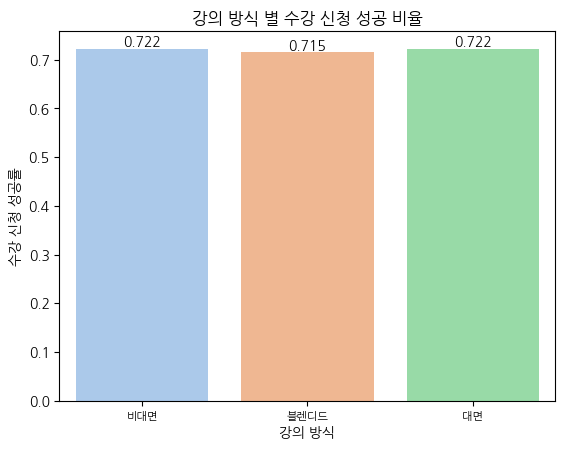

In [ ]:
mean_prob = data.groupby('lecture_type')['prob_success'].mean().round(3).tolist()
print(mean_prob)

sns.set_palette("pastel")
sns.barplot(data = data, x = 'lecture_type', y = 'prob_success', order = [0, 1, 2], ci=False) # order: 순서 정렬
plt.xlabel("강의 방식")
plt.ylabel("수강 신청 성공률")
plt.title("강의 방식 별 수강 신청 성공 비율", fontsize = 12)
plt.xticks([0, 1, 2], ['비대면', '블렌디드', '대면'], fontsize = 8) # x축 눈금 설정. 회전 시키거나 글씨 크기 조절 가능.
for i, v in enumerate(mean_prob):
    plt.text(i, v, str(v), ha='center', va='bottom')
#plt.show()
plt.savefig('/content/drive/MyDrive/23-2_DSL/EDA/prob_success.png')

[0.838, 0.823, 0.864]


<ipython-input-92-89a0128d174f>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = pm_data, x = 'lecture_type', y = 'prob_success_m', order = [0, 1, 2], ci=False) # order: 순서 정렬


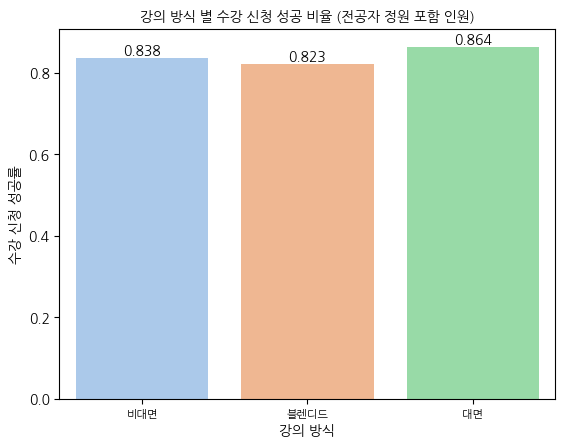

In [ ]:
pm_data = data.dropna(subset =['prob_success_m'])
mean_m_prob = pm_data.groupby('lecture_type')['prob_success_m'].mean().round(3).tolist()
print(mean_m_prob)

sns.set_palette("pastel")
sns.barplot(data = pm_data, x = 'lecture_type', y = 'prob_success_m', order = [0, 1, 2], ci=False) # order: 순서 정렬
plt.xlabel("강의 방식")
plt.ylabel("수강 신청 성공률")
plt.title("강의 방식 별 수강 신청 성공 비율 (전공자 정원 포함 인원)", fontsize = 10)
plt.xticks([0, 1, 2], ['비대면', '블렌디드', '대면'], fontsize = 8) # x축 눈금 설정. 회전 시키거나 글씨 크기 조절 가능.
for i, v in enumerate(mean_m_prob):
    plt.text(i, v, str(v), ha='center', va='bottom')
#plt.show()
plt.savefig('/content/drive/MyDrive/23-2_DSL/EDA/prob_success_m.png')

[0.535, 0.564, 0.505]


<ipython-input-93-54ea04529f66>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = pum_data, x = 'lecture_type', y = 'prob_success_um', order = [0, 1, 2], ci=False) # order: 순서 정렬


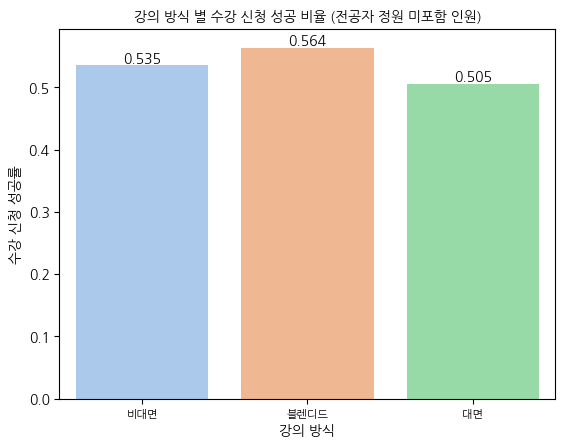

In [ ]:
pum_data = data.dropna(subset =['prob_success_um'])
mean_um_prob = pum_data.groupby('lecture_type')['prob_success_um'].mean().round(3).tolist()
print(mean_um_prob)

sns.set_palette("pastel")
sns.barplot(data = pum_data, x = 'lecture_type', y = 'prob_success_um', order = [0, 1, 2], ci=False) # order: 순서 정렬
plt.xlabel("강의 방식")
plt.ylabel("수강 신청 성공률")
plt.title("강의 방식 별 수강 신청 성공 비율 (전공자 정원 미포함 인원)", fontsize = 10)
plt.xticks([0, 1, 2], ['비대면', '블렌디드', '대면'], fontsize = 8) # x축 눈금 설정. 회전 시키거나 글씨 크기 조절 가능.
for i, v in enumerate(mean_um_prob):
    plt.text(i, v, str(v), ha='center', va='bottom')
#plt.show()
plt.savefig('/content/drive/MyDrive/23-2_DSL/EDA/prob_success_um.png')